In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
from keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score , precision_score , recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/gdrive')

### Define some constants

In [2]:
LABELS = ["Normal", "Fraud"]

### Load the dataset

In [3]:
df = pd.read_csv('gdrive/My Drive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [4]:
# Let's check the shape of the data
df.shape

(284807, 31)

In [5]:
# We can then check for null values
df.isnull().values.any()

False

### Transaction class distribution

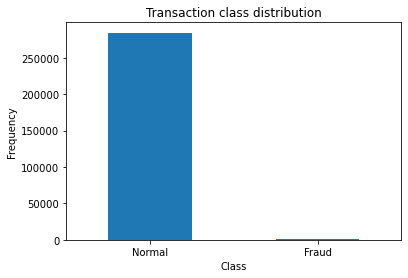

In [6]:
class_count = pd.value_counts(df['Class'], sort = True)
class_count.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [7]:
fraud_indices=np.array(df[df.Class==1].index)
fraud_trans=len(fraud_indices)
normal_indices=np.array(df[df.Class==0].index)
norml_trans=len(normal_indices)

print("Total Fraudulent Transaction is {} and Total Normal Transaction is {}".format(fraud_trans, norml_trans))

Total Fraudulent Transaction is 492 and Total Normal Transaction is 284315


We have a class imbalance on the dataset with normal transactions having a greater count than the fraud transaction

## Before applying SMOTE

Split data into training and testing

In [8]:
X = df.drop(columns={'Class'})
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train.shape

(227845, 30)

In [11]:
X_test.shape

(56962, 30)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_test = y_test.ravel()
y_train = y_train.ravel()

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Display the heatmap for correlation matrix

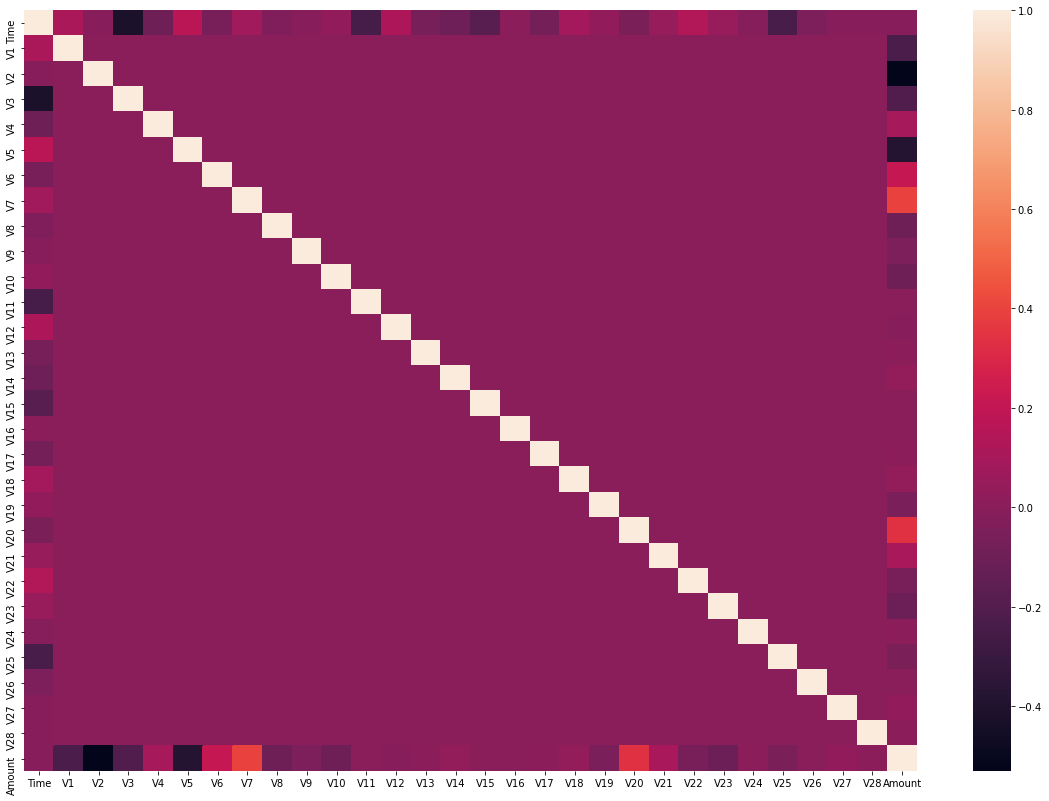

In [14]:
plt.figure(figsize=(20,14))
corr = X.corr()
sns.heatmap(corr)

without applying smote which is use for balance the dataset

## **Before applying SMOTE**

## 1. **Artificial Neural Network (ANN)**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
228/228 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8562
Epoch 2/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9983
Epoch 3/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9983
Epoch 4/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0087 - accur

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


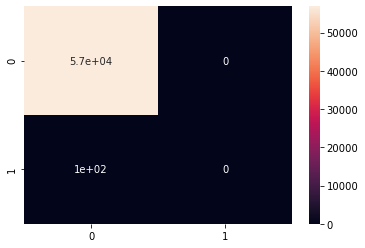

In [15]:
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(10, activation = 'relu', input_dim = 30))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(1,  activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20)
# Predicting the Test set results
y_pred5 = classifier.predict(X_test).round()
y_pred5 = (y_pred5 > 0.5)
# Making the Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True)
#find accuracy

print('ANN:',accuracy_score(y_test,y_pred5))
# find classification report

print('f1_score:',f1_score(y_test,y_pred5))
print('precision_score:',precision_score(y_test,y_pred5))
print('recall_score:',recall_score(y_test,y_pred5))

## 2. **Autoencoders**

In [16]:
input_size = X_train.shape[1]
encoding_size = 14

In [17]:
input_layer = Input(shape=(input_size, ))

encoder_1 = Dense(encoding_size, activation="relu", activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder_2 = Dense(int(encoding_size / 2), activation="relu")(encoder_1)
decoder_1 = Dense(encoding_size, activation='relu')(encoder_2)
output_layer = Dense(input_size, activation='relu')(decoder_1)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [18]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='./logs', write_images=True)

history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test, X_test),
                  callbacks=[tensorboard]).history

Epoch 1/50
14241/14241 [==============================] - 41s 3ms/step - loss: 0.7954 - accuracy: 0.4314 - val_loss: 0.7588 - val_accuracy: 0.5199
Epoch 2/50
14241/14241 [==============================] - 40s 3ms/step - loss: 0.7461 - accuracy: 0.5338 - val_loss: 0.7456 - val_accuracy: 0.5429
Epoch 3/50
14241/14241 [==============================] - 40s 3ms/step - loss: 0.7402 - accuracy: 0.5461 - val_loss: 0.7427 - val_accuracy: 0.5537
Epoch 4/50
14241/14241 [==============================] - 40s 3ms/step - loss: 0.7364 - accuracy: 0.5549 - val_loss: 0.7395 - val_accuracy: 0.5559
Epoch 5/50
14241/14241 [==============================] - 41s 3ms/step - loss: 0.7338 - accuracy: 0.5607 - val_loss: 0.7373 - val_accuracy: 0.5611
Epoch 6/50
14241/14241 [==============================] - 40s 3ms/step - loss: 0.7319 - accuracy: 0.5661 - val_loss: 0.7358 - val_accuracy: 0.5633
Epoch 7/50
14241/14241 [==============================] - 40s 3ms/step - loss: 0.7308 - accuracy: 0.5684 - val_loss: 0

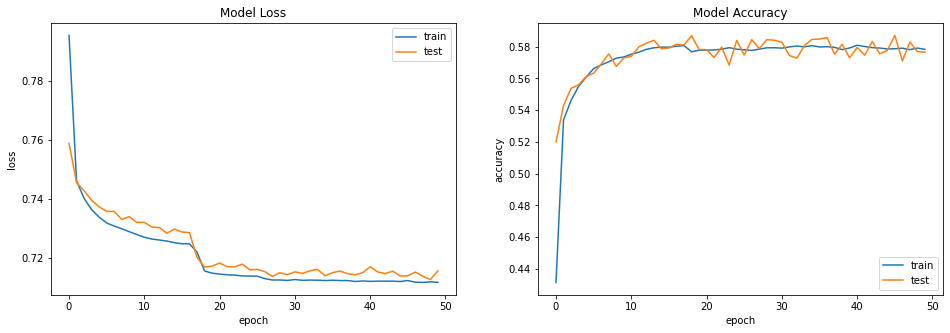

In [19]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.subplot(1,2,2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.show()

In [20]:
prediction = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})

In [21]:
mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})

In [22]:
without_fraud = error[error.actual_class==0]
with_fraud = error[error.actual_class==1]

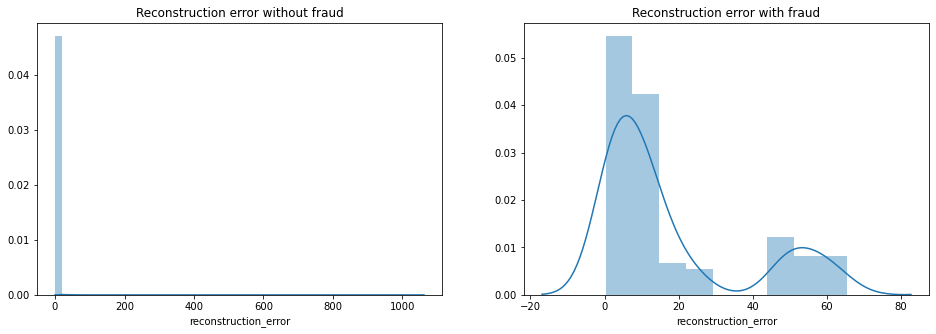

In [23]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(without_fraud["reconstruction_error"])
plt.title("Reconstruction error without fraud")

plt.subplot(1,2,2)
sns.distplot(with_fraud["reconstruction_error"])
plt.title("Reconstruction error with fraud")

plt.show()

In [24]:
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Confusion Matrix:
 [[55910   951]
 [   19    82]]
Accuracy: 98.30%


# **Aplication of SMOTE Technique**

SMOTE helps balance the dataset for more accurate results

In [25]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [30]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(valid["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [31]:
# Let's see the shape of the test and train data
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (227845, 30)
y_train dataset:  (227845,)
X_test dataset:  (56962, 30)
y_test dataset:  (56962,)


In [32]:
print("before applying smote class (1):",format(sum(y_train == 1)))
print("before applying smote class (0):",format(sum(y_train == 0)))

before applying smote: 391
before applying smote: 227454


In [33]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

print('After applying smote X_train: {}\n'.format(X_train.shape))
print('After applying smote y_train: {}\n'.format(y_train.shape))

print("After applying smote label '1': {}\n".format(sum(y_train == 1)))
print("After applying smote label '0': {}\n".format(sum(y_train == 0)))

After applying smote X_train: (454908, 30)

After applying smote y_train: (454908,)

After applying smote label '1': 227454

After applying smote label '0': 227454



# **ANN with SMOTE**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
455/455 [==============================] - 1s 2ms/step - loss: 0.2641 - accuracy: 0.8958
Epoch 2/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9641
Epoch 3/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9757
Epoch 4/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0490 - acc

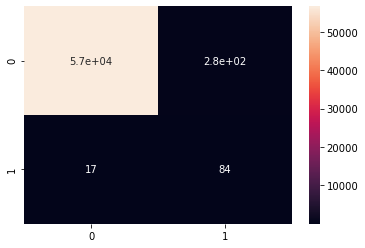

In [34]:
classifier = Sequential()
classifier.add(Dense(10, activation = 'relu', input_dim = 30))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(1,  activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20)
y_pred5 = classifier.predict(X_test).round()
y_pred5 = (y_pred5 > 0.5)
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True)
print('ANN with SMOTE:',accuracy_score(y_test,y_pred5))
print('classification_report:',classification_report(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred5))
print('precision_score:',precision_score(y_test,y_pred5))
print('recall_score:',recall_score(y_test,y_pred5))

# **Apply Convolutional Neural Network (CNN)**

In [36]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1],1)

In [37]:
X_train.shape , X_test.shape

((454908, 30, 1), (56962, 30, 1))

# **ANN with CNN Architecture and SMOTE**

In [38]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Convolution1D(32 , 2 , activation='relu',input_shape=X_train[0].shape))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Convolution1D(64 , 2 , activation='relu'))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Convolution1D(128 , 2 , activation='relu'))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(units=256, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer=Adam(lr = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)          

In [39]:
history = classifier.fit(X_train, y_train, batch_size = 100, epochs = 10 , validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0353 - accuracy: 0.9876 - val_loss: 0.0187 - val_accuracy: 0.9946
Epoch 2/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0108 - val_accuracy: 0.9973
Epoch 3/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0115 - val_accuracy: 0.9976
Epoch 4/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0102 - val_accuracy: 0.9981
Epoch 5/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0099 - val_accuracy: 0.9984
Epoch 6/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0095 - val_accuracy: 0.9989
Epoch 7/10
4550/4550 [==============================] - 19s 4ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0107 - val_ac

CNN: 0.9991748885221726
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.73      0.84      0.78       101

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

f1_score: 0.7834101382488479
precision_score: 0.7327586206896551
recall_score: 0.8415841584158416


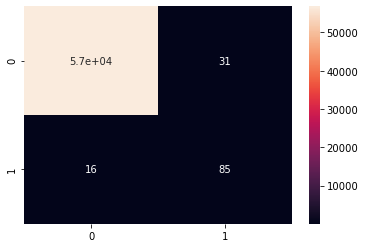

In [40]:
y_pred = classifier.predict(X_test).flatten().round()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print('CNN:',accuracy_score(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

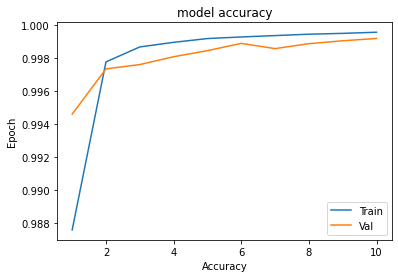

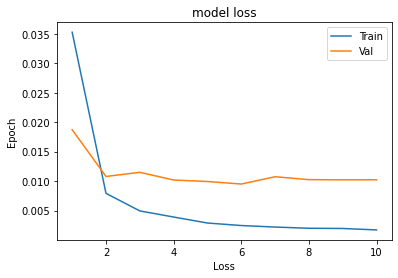

In [41]:
import matplotlib.pyplot as plt
def plot_curve(history , epoch):
    epoch_range = range(1 , epoch+1)
    plt.plot(epoch_range , history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Epoch')
    plt.legend(['Train','Val'])
    plt.show()

    epoch_range = range(1, epoch + 1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('Loss')
    plt.ylabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

plot_curve(history , 10)

# **Autoencoders with SMOTE**

In [46]:
df = df.drop(['Time'], axis=1)
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [48]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = X_train[X_train.Class==0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [49]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (227451, 29)
Shape of X_test: (56962, 29)


In [51]:
input_size = X_train.shape[1]
encoding_size = 14

In [52]:
input_layer = Input(shape=(input_size, ))

encoder_1 = Dense(encoding_size, activation="relu", activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder_2 = Dense(int(encoding_size / 2), activation="relu")(encoder_1)
decoder_1 = Dense(encoding_size, activation='relu')(encoder_2)
output_layer = Dense(input_size, activation='relu')(decoder_1)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

### Visualize training graph using TensorBoard

In [53]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='./logs', write_images=True)

history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test, X_test),
                  callbacks=[tensorboard]).history

Epoch 1/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7799 - accuracy: 0.5381 - val_loss: 0.7779 - val_accuracy: 0.6053
Epoch 2/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7258 - accuracy: 0.6138 - val_loss: 0.7567 - val_accuracy: 0.6277
Epoch 3/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7201 - accuracy: 0.6223 - val_loss: 0.7540 - val_accuracy: 0.6241
Epoch 4/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7182 - accuracy: 0.6241 - val_loss: 0.7523 - val_accuracy: 0.6219
Epoch 5/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7165 - accuracy: 0.6291 - val_loss: 0.7495 - val_accuracy: 0.6340
Epoch 6/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7141 - accuracy: 0.6354 - val_loss: 0.7478 - val_accuracy: 0.6434
Epoch 7/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.7128 - accuracy: 0.6380 - val_loss: 0

### Autoencoders with SMOTE Evaluation

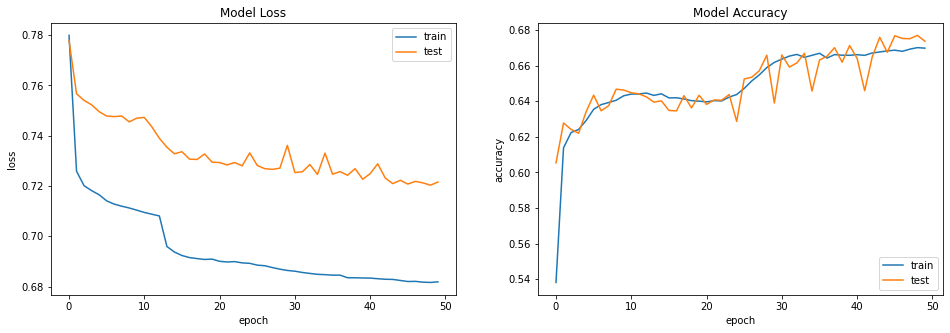

In [54]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.subplot(1,2,2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.show()

In [55]:
prediction = autoencoder.predict(X_test)

In [56]:
mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})
without_fraud = error[error.actual_class==0]
with_fraud = error[error.actual_class==1]

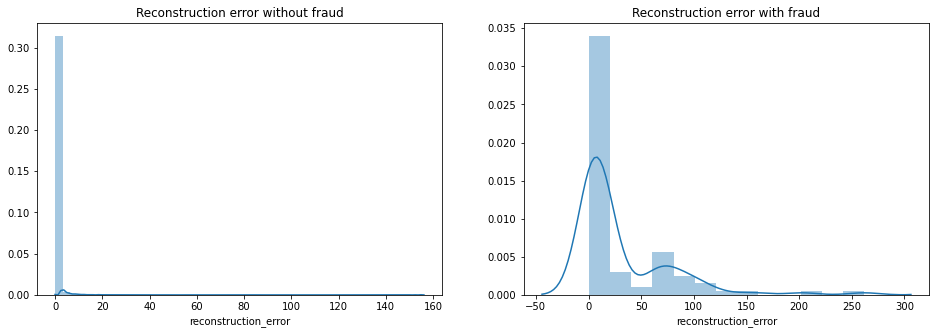

In [57]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(without_fraud["reconstruction_error"])
plt.title("Reconstruction error without fraud")

plt.subplot(1,2,2)
sns.distplot(with_fraud["reconstruction_error"])
plt.title("Reconstruction error with fraud")

plt.show()

In [58]:
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Confusion Matrix:
 [[55662  1202]
 [   20    78]]
Accuracy: 97.85%
